In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [3]:
data = pd.read_csv('Cancer_Data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


#### Data preprocessing

In [4]:
new_data = data.drop(columns=['id','Unnamed: 32'],axis=1)
new_data['diagnosis'] = new_data['diagnosis'].map({
    'M':1,
    'B':0})
new_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


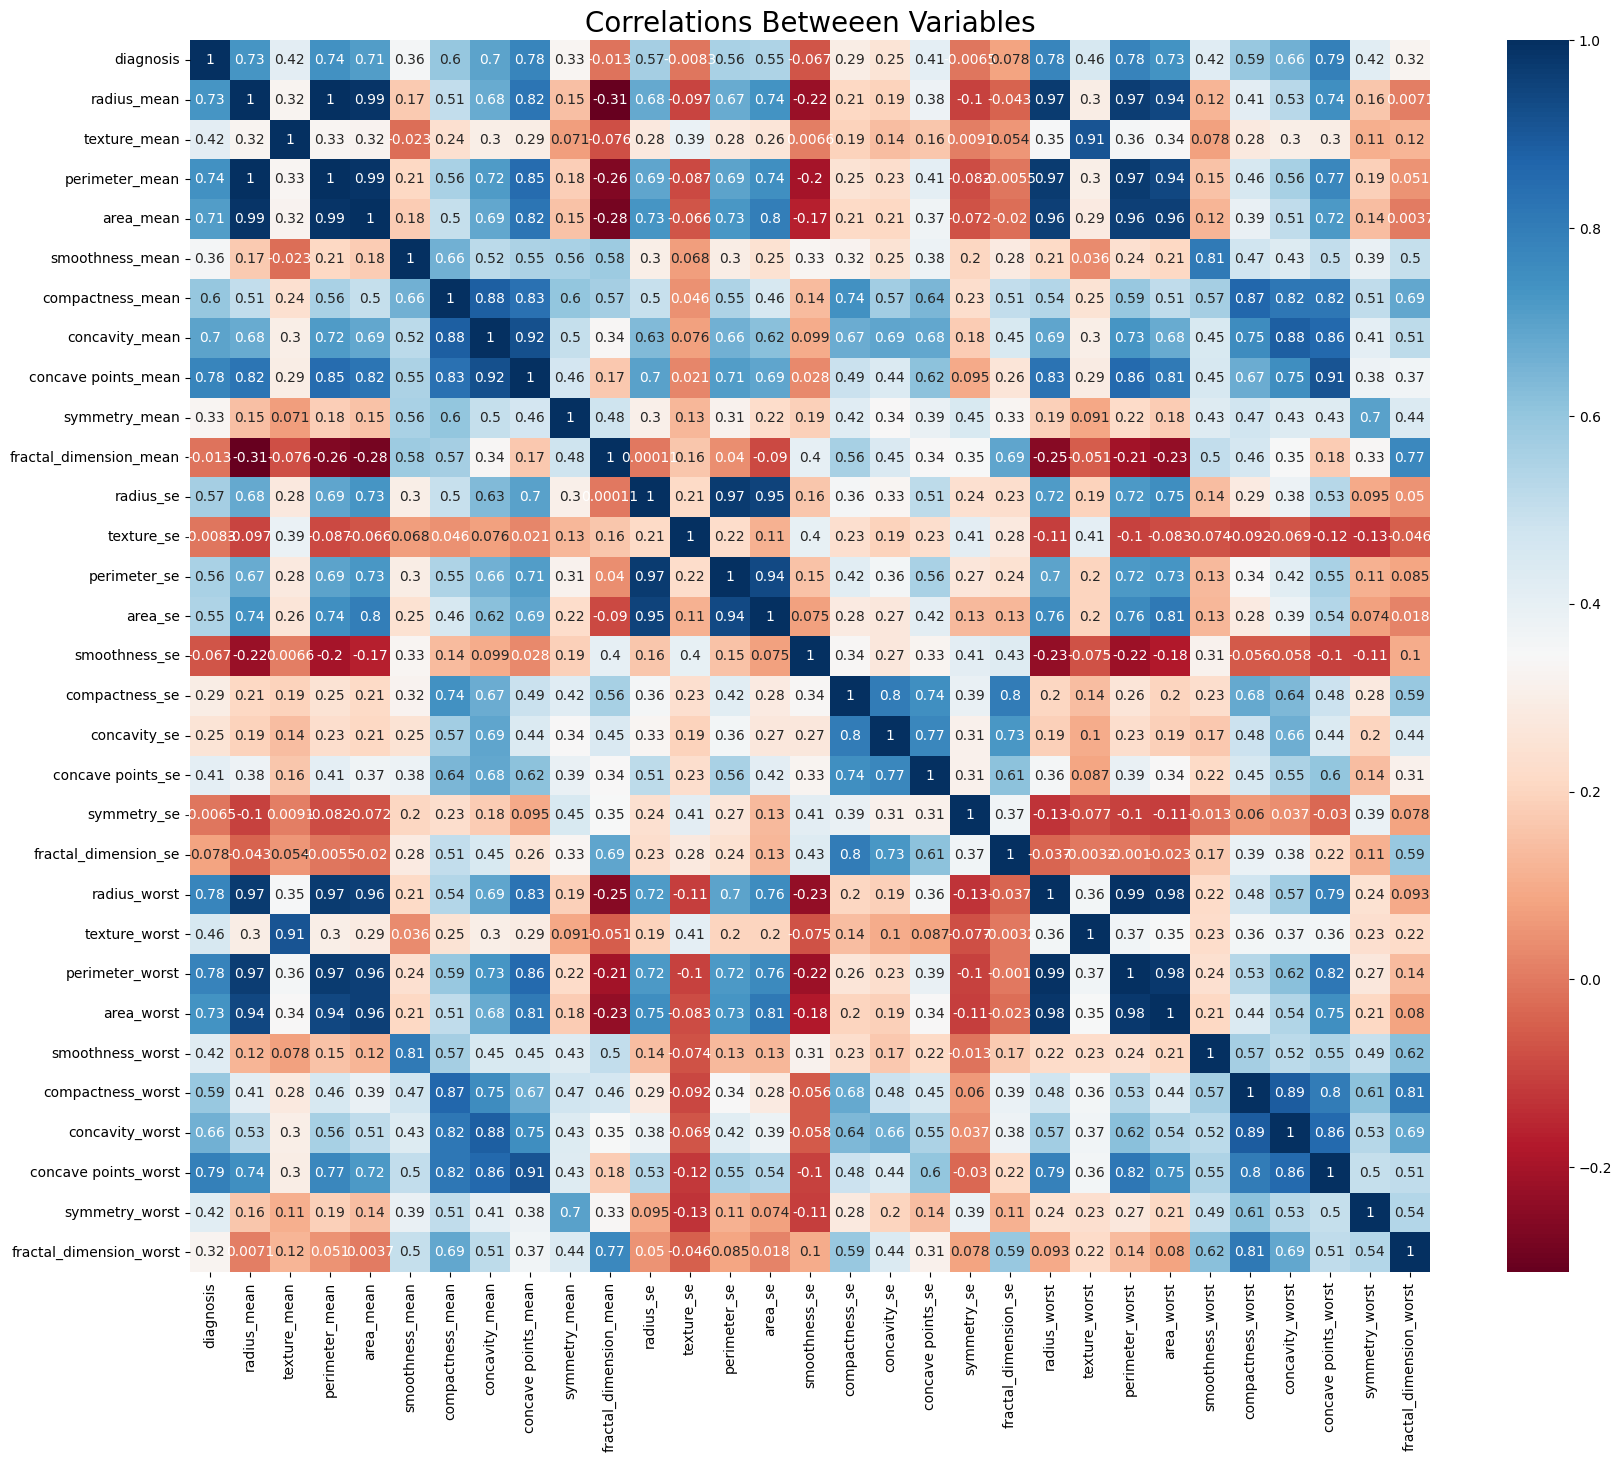

In [5]:
#Correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,16))
sns.heatmap(new_data.corr(), annot=True, cmap="RdBu")
plt.title("Correlations Betweeen Variables", size=20)
plt.show()

In [6]:
new_data.var()

diagnosis                       0.234177
radius_mean                    12.418920
texture_mean                   18.498909
perimeter_mean                590.440480
area_mean                  123843.554318
smoothness_mean                 0.000198
compactness_mean                0.002789
concavity_mean                  0.006355
concave points_mean             0.001506
symmetry_mean                   0.000752
fractal_dimension_mean          0.000050
radius_se                       0.076902
texture_se                      0.304316
perimeter_se                    4.087896
area_se                      2069.431583
smoothness_se                   0.000009
compactness_se                  0.000321
concavity_se                    0.000911
concave points_se               0.000038
symmetry_se                     0.000068
fractal_dimension_se            0.000007
radius_worst                   23.360224
texture_worst                  37.776483
perimeter_worst              1129.130847
area_worst      

##### Normalization

In [7]:
new_data['area_mean']=np.log(new_data['area_mean'])
new_data['perimeter_mean']=np.log(new_data['perimeter_mean'])
new_data['area_se']=np.log(new_data['area_se'])
new_data['perimeter_worst']=np.log(new_data['perimeter_worst'])
new_data['area_worst']=np.log(new_data['area_worst'])
np.var(new_data[["area_mean",'perimeter_mean','area_se','perimeter_worst','area_worst']])

c:\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


area_mean          0.233013
perimeter_mean     0.062932
area_se            0.529199
perimeter_worst    0.084470
area_worst         0.307392
dtype: float64

In [8]:
X = data.drop(columns = ['id','Unnamed: 32','diagnosis'],axis=1)
Y = data["diagnosis"].map({
    "M":1,
    "B":0
})
Y.value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

#### Splitting test and train data

In [9]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

#### Modelling

##### 1. Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=10000)
rf.fit(X_train,Y_train)
#Accuracy on training data
pred_train_rf = rf.predict(X_train)
rf_train_accuracy = round(accuracy_score(pred_train_rf,Y_train)*100,2)
print("The accuracy score achieved using the Random Forest model is: "+str(rf_train_accuracy)+" %")
#Accuracy on test data
rf_test_pred = rf.predict(X_test)
rf_test_accuracy = round(accuracy_score(rf_test_pred,Y_test)*100,2)
print("The accuracy score achieved using the Random Forest model is: "+str(rf_test_accuracy)+" %")

The accuracy score achieved using the Random Forest model is: 100.0 %
The accuracy score achieved using the Random Forest model is: 95.61 %


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


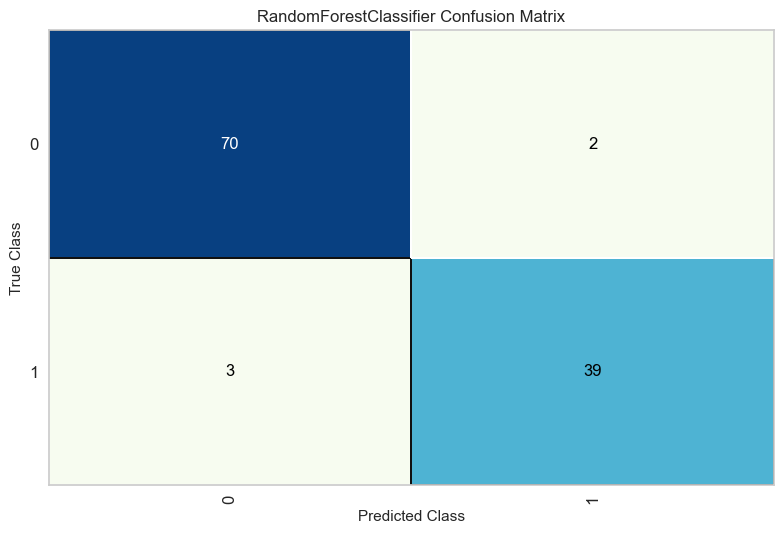

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [11]:
from sklearn.metrics import confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassPredictionError

rf_cm = ConfusionMatrix(rf, cmap='GnBu')
rf_cm.fit(X_train, Y_train)
rf_cm.score(X_test, Y_test)
rf_cm.show()

In [12]:
print(classification_report(Y_test,rf_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        72
           1       0.95      0.93      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



##### 2. Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
#Accuracy on training data
lg_train_prediction = model.predict(X_train)
lg_training_data_accuracy = round(accuracy_score(lg_train_prediction,Y_train)*100,2)
print("The accuracy score achieved using the Logistic Regression model is: "+str(lg_training_data_accuracy)+" %")
#Accuracy on test data
lg_test_prediction = model.predict(X_test)
lg_test_data_accuracy = round(accuracy_score(lg_test_prediction,Y_test)*100,2)
print("The accuracy score achieved using the Logistic Regression model is: "+str(lg_test_data_accuracy)+" %")

The accuracy score achieved using the Logistic Regression model is: 94.95 %
The accuracy score achieved using the Logistic Regression model is: 92.98 %


c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### 3. Support Vector Machine

In [14]:
from sklearn.svm import SVC
svm = SVC(probability=True)
svm.fit(X_train,Y_train)
#Accuracy on training data
svc_train_prediction = svm.predict(X_train)
svc_training_data_accuracy = round(accuracy_score(svc_train_prediction,Y_train)*100,2)
print("The accuracy score achieved using the SVM model is: "+str(svc_training_data_accuracy)+" %")
#Accuracy on test data
svc_test_prediction = svm.predict(X_test)
svc_test_data_accuracy = round(accuracy_score(svc_test_prediction,Y_test)*100,2)
print("The accuracy score achieved using the SVM model is: "+str(svc_test_data_accuracy)+" %")


The accuracy score achieved using the SVM model is: 91.65 %
The accuracy score achieved using the SVM model is: 93.86 %


##### 4. KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
#Accuracy on training data
knn_train_prediction = knn.predict(X_train)
knn_training_data_accuracy = round(accuracy_score(knn_train_prediction,Y_train)*100,2)
print("The accuracy score achieved using the KNN model is: "+str(knn_training_data_accuracy)+" %")
#Accuracy on test data
knn_test_prediction = knn.predict(X_test)
knn_test_data_accuracy = round(accuracy_score(knn_test_prediction,Y_test)*100,2)
print("The accuracy score achieved using the KNN model is: "+str(knn_test_data_accuracy)+" %")

The accuracy score achieved using the KNN model is: 95.38 %
The accuracy score achieved using the KNN model is: 93.86 %


##### 5.Naive Bayes Model

In [16]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,Y_train)
#Accuracy on training data
nbm_train_prediction = nb.predict(X_train)
nbm_training_data_accuracy = round(accuracy_score(nbm_train_prediction,Y_train)*100,2)
print("The accuracy score achieved using the Naive Bayes model is: "+str(nbm_training_data_accuracy)+" %")
#Accuracy on test data
nbm_test_prediction = nb.predict(X_test)
nbm_test_data_accuracy = round(accuracy_score(nbm_test_prediction,Y_test)*100,2)
print("The accuracy score achieved using the Naive Bayes model is: "+str(nbm_test_data_accuracy)+" %")

The accuracy score achieved using the Naive Bayes model is: 94.51 %
The accuracy score achieved using the Naive Bayes model is: 92.11 %


##### Comparison of Model Accuracy

In [17]:
scores = [lg_test_data_accuracy,nbm_test_data_accuracy,svc_test_data_accuracy,knn_test_data_accuracy,rf_test_accuracy]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Random Forest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 92.98 %
The accuracy score achieved using Naive Bayes is: 92.11 %
The accuracy score achieved using Support Vector Machine is: 93.86 %
The accuracy score achieved using K-Nearest Neighbors is: 93.86 %
The accuracy score achieved using Random Forest is: 95.61 %


Text(0, 0.5, 'Accuracy score')

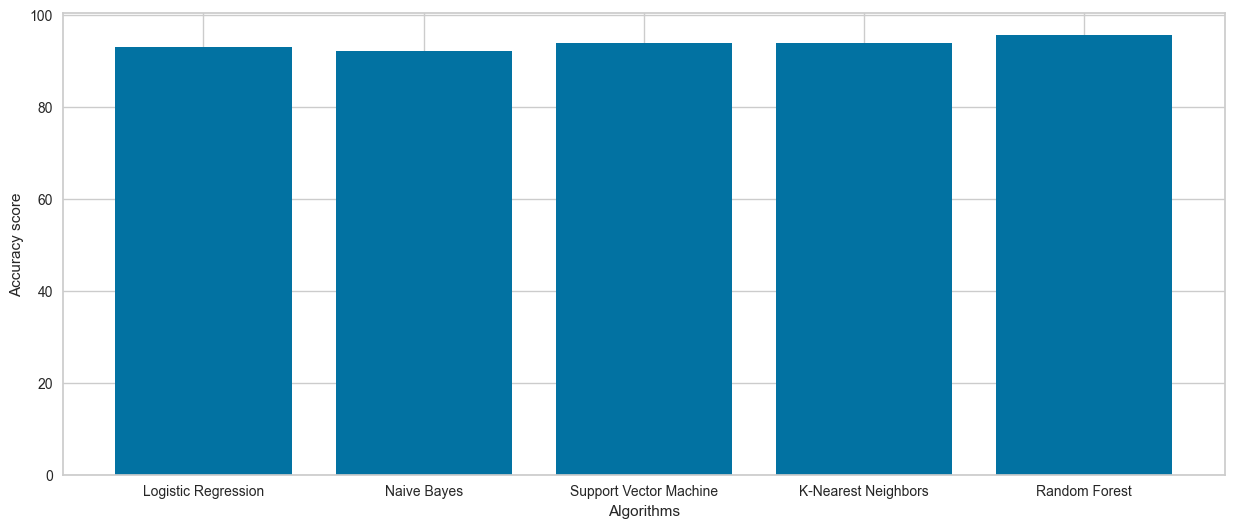

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize= (15,6))
plt.bar(algorithms,scores)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


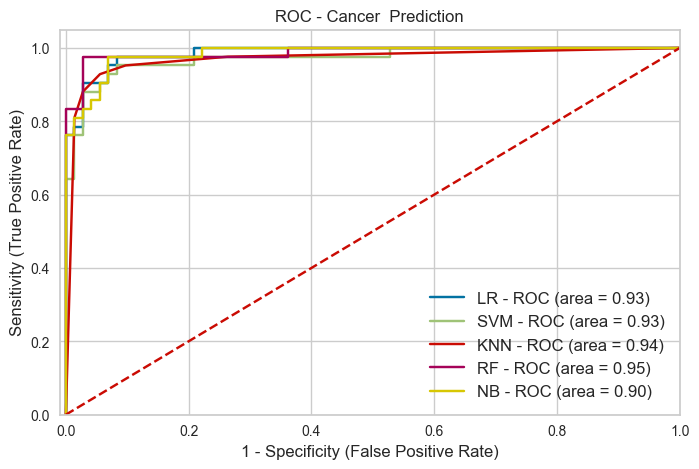

In [19]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': model,
},

{
    'label': 'SVM',
    'model': svm,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'RF',
    'model': rf,
},
{
   'label': 'NB',
   'model': nb,
}
]
for m in models:
    model = m['model'] 
    model.fit(X_train, Y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(Y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(Y_test,model.predict(X_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Cancer  Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
#plt.savefig("outputs/roc_diabetes.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

#### Predictive Model

In [20]:
input_data = (17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189)
#change input data to numpy array
input_array = np.array(input_data).reshape((1, -1))
prediction = rf.predict(input_array)
print("Predicted value: ", prediction)
if prediction[0]==0:
    print("Benign Cancer")
else:
    print("Malignant Cancer")

c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Predicted value:  [1]
Malignant Cancer


In [21]:
import pickle
file_name = 'cancer_model.sav'
pickle.dump(rf,open(file_name,'wb'))